# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

We start by importing the below packages:

In [1]:
import numpy as np
import itertools as it
import seaborn as sns
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject
from scipy import optimize


# Question 1

We now set the parameters for the assignment.

In [2]:
# a. Set parameter values:
m = 1          # Cash-on-hand
nu = 10        # Labour disutility scalar
epsilon = 0.3  # Frisch elasticity of labour supply
tau0 = 0.4     # Standard labour tax rate
tau1 = 0.1     # Extra tax when paying top tax
kappa = 0.4    # Income cut-off for paying top tax
w = 0.5        # Wage
x_resource = 2 # Total resources

In [3]:

# b. We define the utility function  given the parameters above
def utility(l, c):
    return np.log(c) - nu*(l**(1 + 1/epsilon)/(1 + 1/epsilon))

# c. Likewise the budget constraint
def budget_constraint(l):
    return m + w*l - (tau0*w*l + tau1*max((w*l - kappa), 0))

# d. We thus define anobjective function we wish to minimize
def objective(l):
    c = budget_constraint(l)
    
    return -utility(l, c) # It is negative since we're going to minimize the objective function

# e. We write a function that calls a solver to optimize the choice of labour supply
def find_solution():
    res = optimize.minimize_scalar(
        objective,
        method = 'bounded', 
        bounds = (0,1)
    )
    
    l_star = res.x
    c_star = budget_constraint(l_star)
    utility_star = utility(l_star, c_star)

    
    return [l_star, c_star, utility_star]

In [4]:
#We call the results from the above function printing the optimal labour, consumpton and the utility of those:
find_solution()

[0.33924126400854654, 1.101772379202564, 0.07560365728425235]

# Question 2

We generate values of optimal labour supply and consumption at different wage level to use in figure

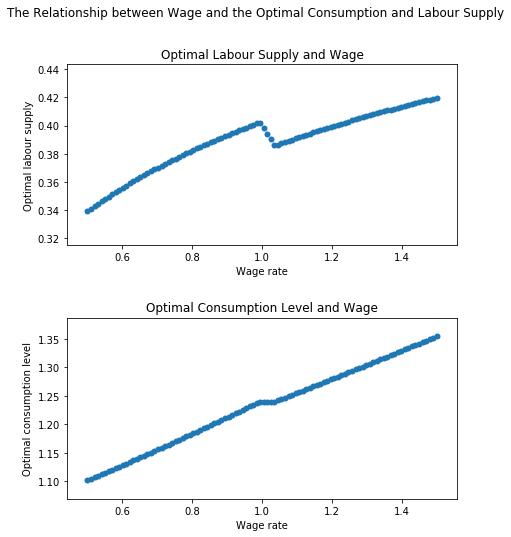

In [5]:
# a. We generate values of optimal labour supply and consumption at different wage level to use in figure
# i. We define vectors to use in the loop
N_fig = 100
w_vec = np.linspace(0.5, 1.5, N_fig)
l_star_vec = np.empty(N_fig)
c_star_vec = np.empty(N_fig)

# ii. Optimize utility with different wages in interval [0.5, 1.5], i.e. w_vec
for i, wi in enumerate(w_vec):
    
    # o. Changing the parameter input in find_solution()
    w = wi 
    
    # oo. Call function from previous exercise
    fs = find_solution()
    
    # ooo. Replace the optimal labour supply and consumption levels in vectors
    l_star_vec[i] = fs[0]
    c_star_vec[i] = fs[1]
    
    
# b. Plot optimal labour supply and optimal consumption level as a function of the wage
import seaborn as sns
import matplotlib.pyplot as plt

# i. Make a figure with two subplots
fig, axes = plt.subplots(2, figsize=(7,8))

# ii. We add title and adjust the width and height
plt.suptitle("The Relationship between Wage and the Optimal Consumption and Labour Supply")
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# iii. First subplot: Optimal labour supply and the wage rate
sns.scatterplot(
    x=w_vec, y=l_star_vec,
    palette=sns.color_palette("hls", 10),
    linewidth=0,
    legend=None, 
    ax = axes[0]
)
#We set y and x labesl as well as the title
axes[0].set_ylabel("Optimal labour supply")
axes[0].set_xlabel("Wage rate")
axes[0].set_title("Optimal Labour Supply and Wage")

# iii. Second subplot: Optimal consumption and the wage rate
sns.scatterplot(
    x=w_vec, y=c_star_vec,
    palette=sns.color_palette("hls", 10),
    linewidth=0,
    legend=None, 
    ax = axes[1]
)
#We set y and x labesl as well as the title
axes[1].set_ylabel("Optimal consumption level")
axes[1].set_xlabel("Wage rate")
axes[1].set_title("Optimal Consumption Level and Wage")

plt.show()

# Question 3

The total tax revenue is 2747.8, as seen from the output of the code below. 

In [6]:
# a. Setting variables
N = 10000 # Population size
wi = np.random.uniform(low = 0.5, high = 1.5, size = N) # Distribution of wage rates

# b. Calculate the total tax revenue
# ii. Write function for individual taxcontribution
def tax_contribution(l):
    return tau0*w*l + tau1*max((w*l - kappa), 0)

# ii. Write a function that calculates the tax revenue by looping over all individuals
def tax_revenue(N, wi):
    # o. Initiate the sum in tax revenue
    T = 0
    
    for i in range(N):
        # oo. Get the individual's wage rate
        w = wi[i]

        # ooo. Find the individual's optimal labour supply
        sol = find_solution()
        l_opt = sol[0]

        # oooo. Add the individual's tax contribution to the tax revenue
        T += tax_contribution(l_opt)

    return T

# c. Print tax revenue
tax_revenue(N, wi)

2747.8883606062095

# Question 4

The total tax revenue with $\varepsilon=0.1$ is 5125.3, as seen from the output of the code below. 

In [7]:
# a. Change value of epsilon
epsilon = 0.1

# b. Calculate and print tax revenue from the above function
tax_revenue(N, wi)

5125.326797897969

# Question 5

The below code will require you to have the .py file

In [8]:
# We create a random wage uniformly distributed, but with N=100 for faster kernel-speed.
# This is were we started to import functions from the .py file

w_rand = np.random.uniform(0.5,1.5,size = 100)
#We use the totaltax function with tao0, tao1 and kappa as variables
def obj2(x):
    stau0 = x[0]
    stau1 = x[1]
    skappa = x[2]
    return -inauguralproject.tottax(stau0, stau1, skappa, m, nu, epsilon, w_rand)

In [9]:
#We set some initial bounds
bndt0 = (0.0,1.0) # maybe upper bound tao1
bndt1 = (0.0,1.0) # maybe lower bound tao0
bndk = (0.0,1.0)
# combining bounds to one 
bounds2 = (bndt0, bndt1, bndk)

#our initial guess
initial_guess = np.array([0.5,0.5,0.5])

# call solver function
optimaltax = optimize.minimize(obj2, initial_guess, bounds=bounds2, method='SLSQP', options={'disp':True}) # constraints = cons
print(optimaltax)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -25.279542214133592
            Iterations: 7
            Function evaluations: 51
            Gradient evaluations: 7
     fun: -25.279542214133592
     jac: array([-0.0706346 ,  0.21274185,  0.06835866])
 message: 'Optimization terminated successfully.'
    nfev: 51
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.7836596 , 0.59699255, 0.60478653])


In [10]:
#Printing the Solution
tau0 = optimaltax.x[0]
tau1 = optimaltax.x[1]
kappa = optimaltax.x[2]
TAX = inauguralproject.tottax(tau0, tau1, kappa, m, nu, epsilon, w_rand)
inauguralproject.find_solution2(tau0,tau1,kappa,TAX)

The optimal tau0 is thus = 0.78365960
The optimal tau1 is thus = 0.59699255
The optimal kappa is thus = 0.60478653
These give a tax revenue of = 25.27954221


# Conclusion

As so we've run through the problem set giving a possible answer to each of the questions.

We find that that in question 1 the optimal labour is 0.33, the optimal consumption is 1.1 which yields a utility of 0.07.

We find that the optimal labour and consumption is increasing with the wage in question 2

In question 3 we find the total tax revenue to 2747.8

In question 4 we find a total tax revenue to 5125.3 if $\varepsilon=0.1$

Lastly we find in question 5 that:

the optimal $\tau_0$ is 0.78455867

the optimal $\tau_1$ is 0.59699255

the optimal $\kappa$ is 0.60478653

Which yields a tax revenue of 25.27954221


